In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
from urllib.request import urlretrieve


In [5]:
url = ("https://downloads.psl.noaa.gov/Datasets/noaa.ersst.v5/")
filename = ("sst.mon.ltm.1991-2020.nc")
file = urlretrieve(url, filename)
ds_assignment = xr.open_dataset(file, engine= "netcdf4")

ValueError: can only read bytes or file-like objects with engine='scipy' or 'h5netcdf'

In [3]:
ds = xr.open_dataset('sst.mnmean.nc')
ds_month = ds.groupby('time.month').mean()
ds_month

<xarray.Dataset> Size: 3MB
Dimensions:  (month: 12, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float32 3MB -1.79 -1.79 -1.79 ... -1.79 -1.79
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

Text(0.5, 0.92, 'Mean Seasonal Palmer Drought Standardized Index')

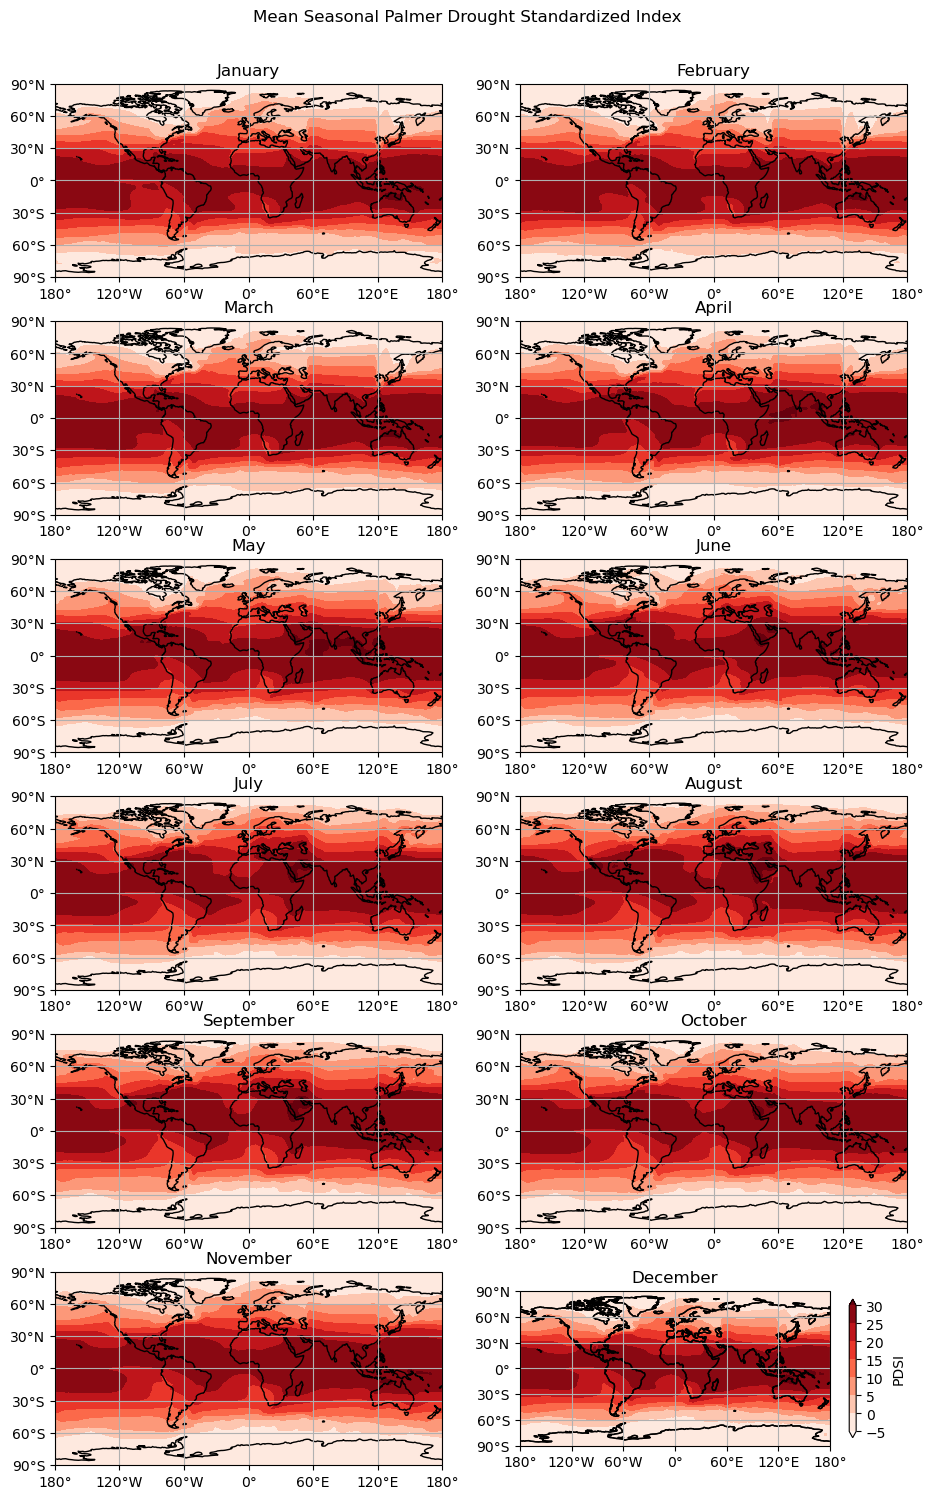

In [4]:
clevs=np.arange(-5,31,5)

fig, axs = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,18))

axs=axs.flatten()

for i, month in enumerate(ds_month['month']):

        data=ds_month['sst'].sel(month=month)

        data,lons=add_cyclic_point(data,coord=ds_month['lon'])

        cs=axs[i].contourf(lons,ds_month['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='Reds',extend='both')

        axs[i].set_title(calendar.month_name[month.values])
        
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter) 

        axs[i].gridlines()

        axs[i].coastlines()

cbar = plt.colorbar(cs, shrink = 0.7, label = "PDSI")

axs[i].coastlines()

plt.suptitle('Mean Seasonal Palmer Drought Standardized Index', y= .92)